In [ ]:
!wget -N https://s3-us-west-2.amazonaws.com/ericmjonas-public/data/neuroproc/transistors.csv

In [2]:
import matplotlib.pyplot as plt
%pylab inline
import pandas as pd
import seaborn as sns
sns.set(style="white", context="talk")

Populating the interactive namespace from numpy and matplotlib


## Transistors

In [49]:
import numpy as np
from tqdm import tqdm

label = np.load("./project/nmos_inference/data_v4/causality_1c_label.npy",mmap_mode="r")
data = np.load("./project/nmos_inference/data_v4/causality_effect_512.npy",mmap_mode="r")
transistors_df = pd.read_csv("./project/nmos_inference/raw_data/transistors.csv")
orig = np.load("./project/nmos_inference/data_v4/original_3510_512.npy",mmap_mode="r")

In [50]:
high = np.load("./project/nmos_simulation/tests/high_3510_512.npy",mmap_mode="r")
low = np.load("./project/nmos_simulation/tests/low_3510_512.npy",mmap_mode="r")

In [5]:
np.where(label[9])

(array([ 290,  917,  918, 2222, 2223, 2224, 2225, 2565, 2566, 2567, 3103,
        3104, 3105, 3106]),)

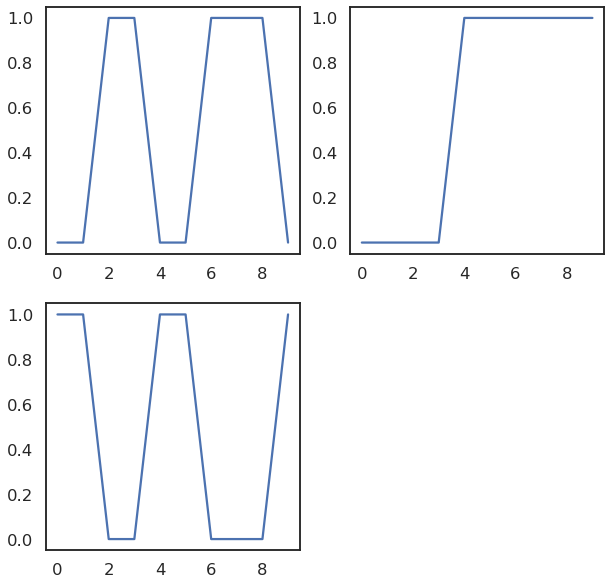

In [48]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(orig[3358][:10] )
plt.subplot(2,2,2)
plt.plot(high[9][8][:10])
plt.subplot(2,2,3)
plt.plot(low[9][3057][:10])

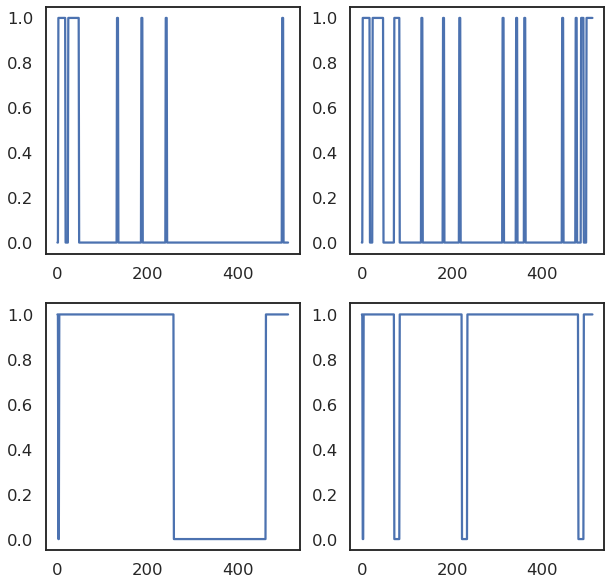

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(orig[158])
plt.subplot(2,2,2)
plt.plot(low[9][158])
plt.subplot(2,2,3)
plt.plot(orig[3361])
plt.subplot(2,2,4)
plt.plot(low[9][3361])

In [57]:
transistors_df.head(20)

,bb,c1,c2,gate,name,on,x,y,pos
0,"[1450, 1510, 5143, 5320]",558,217,357,t0,False,1480.0,5231.5,0
1,"[5424, 5629, 548, 922]",657,349,1608,t1,False,5526.5,735.0,1
2,"[3867, 3899, 2465, 2642]",558,1146,412,t2,False,3883.0,2553.5,2
3,"[7907, 7990, 9237, 9311]",558,943,558,t3,False,7948.5,9274.0,3
4,"[1893, 1910, 530, 927]",230,657,826,t4,False,1901.5,728.5,4
5,"[8489, 8527, 6063, 6388]",558,1319,82,t5,False,8508.0,6225.5,5
6,"[6029, 6049, 762, 791]",289,1514,821,t6,False,6039.0,776.5,6
7,"[7282, 7300, 9212, 9329]",558,1171,558,t7,False,7291.0,9270.5,7
8,"[7302, 7622, 3402, 3430]",558,1199,945,t8,False,7462.0,3416.0,8
9,"[1629, 1647, 1796, 1826]",524,1548,710,t9,False,1638.0,1811.0,9


In [47]:
transistors_df.groupby(by="c2").get_group(1485)

,bb,c1,c2,gate,name,on,x,y,pos
3358,"[7249, 7266, 3406, 3440]",1199,1485,943,t3358,False,7257.5,3423.0,3358


In [87]:
transistors_df.groupby(by="c1").get_group(524).index

Int64Index([9, 3361], dtype='int64')

In [85]:
transistors_df.groupby(by="c2").get_group(1548).index

Int64Index([9, 158], dtype='int64')

In [66]:
transistors_df.groupby(by="gate").get_group(1548).index

KeyError: 1548

## Find the first order following transistors based on the netlist

In [52]:
# Match the label with the netlist
successors = []
for i in tqdm(range(3510)):#label.shape[0]):
  nets = [transistors_df.loc[i]["c1"], transistors_df.loc[i]["c2"]]
  # screen the GND or VCC net
  nets = [net for net in nets if net != 558 and net != 657]
  lim = 1000
  # print("*********************************")
  # print(f"transistor{i}")
  # print("*********************************")
  # print(nets)
  for net in nets:
    try:
      gate_successors = transistors_df.groupby(by="gate").get_group(net).index
    except:
      gate_successors = []
    try:
      c1_succcessors = transistors_df.groupby(by="c1").get_group(net).index
    except:
      c1_succcessors = []
    try:
      c2_successors = transistors_df.groupby(by="c2").get_group(net).index
    except:
      c2_successors = []
    candidate_successors = list(gate_successors) + list(c1_succcessors) + list(c2_successors)
    # print("before screened: ", candidate_successors)
    candidate_successors = [c for c in candidate_successors if c in np.where(label[i])[0]]
    # print("after screened: ", candidate_successors)
    try:
      # get the smallest index cross all the candidates seqs
      causal_start = np.min(np.nonzero(data[i, candidate_successors])[1])
      # print(causal_start)
    except:
      causal_start = 1000
    if causal_start < lim:
      successor = candidate_successors
      lim = causal_start

  if causal_start != 1000:
    successors.append(successor)
  else:
    successors.append(np.nonzero(label[i])[0])

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 3510/3510 [00:38<00:00, 91.06it/s]


In [53]:
successors

[[2673, 2819],
 array([], dtype=int64),
 [215, 3419],
 array([   0,   12,   13, ..., 3491, 3492, 3505]),
 array([], dtype=int64),
 array([1124]),
 array([], dtype=int64),
 array([   0,   12,   13, ..., 3491, 3492, 3505]),
 array([  30,   31,   61,   62,   67,   68,   69,  124,  317,  387,  405,
         406,  446,  479,  482,  483,  484,  485,  486,  487,  488,  559,
         560,  578,  687,  688,  858,  859,  880,  929, 1007, 1162, 1163,
        1191, 1192, 1200, 1272, 1307, 1763, 1764, 1839, 1840, 1864, 1901,
        1902, 1936, 1940, 1976, 1977, 2099, 2210, 2211, 2249, 2250, 2251,
        2252, 2319, 2434, 2435, 2447, 2614, 2615, 2639, 2641, 2794, 2795,
        3015, 3016, 3026, 3027, 3046, 3113, 3124, 3152, 3234, 3481, 3482]),
 array([ 290,  917,  918, 2222, 2223, 2224, 2225, 2565, 2566, 2567, 3103,
        3104, 3105, 3106]),
 [438, 439],
 array([], dtype=int64),
 array([  30,   31,   61,   62,  328,  387,  405,  406,  479,  547,  548,
        1007, 1162, 1163, 1191, 1192, 1381, 

In [58]:
np.save("./project/nmos_inference/data_v4/causality_1st_label.npy",bin_label)

In [56]:
label = successors
bin_label = np.zeros((3510,3510))
for i in range(len(label)):
  for j in label[i]:
    bin_label[i,j] = 1


In [57]:
# Check the sample balance
sum(bin_label==1)/len(bin_label.flatten())

0.0027179162506797833

                         bb   c1   c2  gate  name     on       x      y  pos
1    [5424, 5629, 548, 922]  657  349  1608    t1  False  5526.5  735.0    1
375  [5737, 5769, 643, 658]  558  349   869  t375  False  5753.0  650.5  375
376  [5541, 5643, 643, 658]  558  349   869  t376  False  5592.0  650.5  376
378  [5716, 5730, 225, 634]  558  349   869  t378  False  5723.0  429.5  378


(0.0, 9000.0)

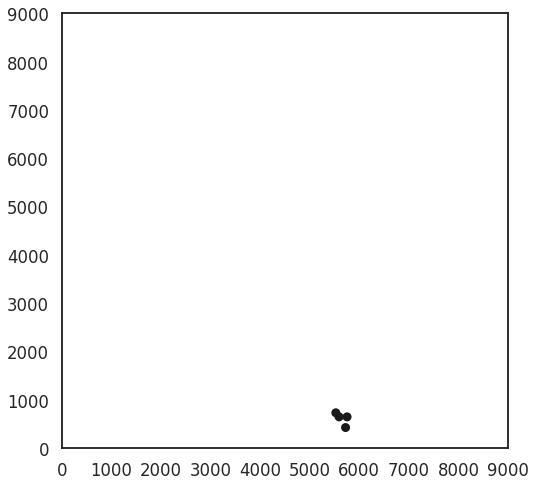

In [18]:
transistors_df = transistors_df.groupby(by="c2").get_group(349)
print(transistors_df)
pylab.figure(figsize=(8, 8))
pylab.scatter(transistors_df.x, transistors_df.y, c='k', edgecolor='none')
pylab.xlim(0, 9000)
pylab.ylim(0, 9000)

## Netlist

In [12]:
!wget -N https://s3-us-west-2.amazonaws.com/ericmjonas-public/data/neuroproc/wires.csv

--2022-03-03 03:52:05--  https://s3-us-west-2.amazonaws.com/ericmjonas-public/data/neuroproc/wires.csv
Resolving s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)... 52.218.237.144
Connecting to s3-us-west-2.amazonaws.com (s3-us-west-2.amazonaws.com)|52.218.237.144|:443... connected.
HTTP request sent, awaiting response... 304 Not Modified
File ‘wires.csv’ not modified on server. Omitting download.



In [4]:
wires_df = pd.read_csv("./project/nmos_inference/raw_data/wires.csv").fillna("") 
wires_df.head()

,wireid,c1c2s,gates,pullup,name
0,0,8,4,True,op-T5-rts
1,1,2,1,False,x2
2,2,2,0,False,
3,3,4,0,True,
4,4,8,1,True,op-T0-tay


In [27]:
wires_df[wires_df.wireid==558]

,wireid,c1c2s,gates,pullup,name
551,558,2493,17,False,vss


In [26]:
wires_df.shape

(1704, 5)

In [ ]:
import seaborn as sns
wires_df[wires_df.c1c2s==wires_df.c1c2s.max()]
#sns.histplot(wires_df.c1c2s)

,wireid,c1c2s,gates,pullup,name
551,558,2493,17,False,vss


In [ ]:
print(wires_df[wires_df.name=="vcc"])
print(wires_df[wires_df.name=="cclk"])

     wireid  c1c2s  gates  pullup name
649     657    234      0   False  vcc
     wireid  c1c2s  gates  pullup  name
932     943      6    273   False  cclk


The fields are as follows:
- `wireid` : the ID of this net, referenced from `transistors.csv`
- `c1c2s` : how many c1 and c2 terminals are connected to this net
- `gates` : how many gates are connected to this net
- `pullup` : Is this a pullup net? 
- `name` : a canonical name for this wire. This is how you can find the clock, etc. 

In [ ]:
# let's look at all transistors which have clock on their gate
cclk = wires_df[wires_df.name == "cclk"].iloc[0]
cclk

wireid      943
c1c2s         6
gates       273
pullup    False
name       cclk
Name: 932, dtype: object

In [ ]:
trans_clocked = transistors_df[transistors_df.gate == cclk.wireid]

(0, 9000)

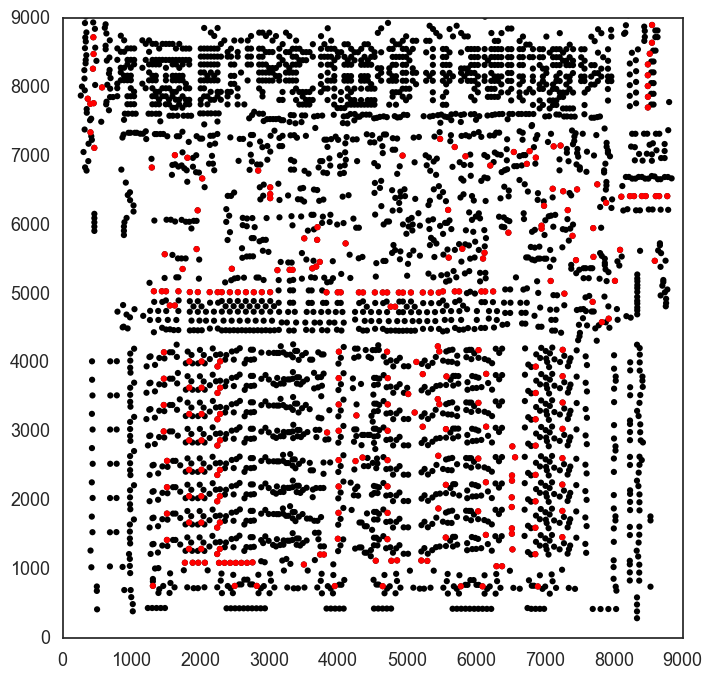

In [ ]:
# plot transistor locations
pylab.figure(figsize=(8, 8))
pylab.scatter(transistors_df.x, transistors_df.y, c='k', edgecolor='none')
pylab.scatter(trans_clocked.x, trans_clocked.y, c='r', edgecolor='none')

pylab.xlim(0, 9000)
pylab.ylim(0, 9000)
#pylab.axes().set_aspect('equal', 'datalim')
